In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split , cross_val_score,GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier ,RandomForestClassifier

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [5]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
uni={col : len(df[col].unique()) for col in df.columns}
uni

{'age': 41,
 'sex': 2,
 'cp': 4,
 'trestbps': 49,
 'chol': 152,
 'fbs': 2,
 'restecg': 3,
 'thalach': 91,
 'exang': 2,
 'oldpeak': 40,
 'slope': 3,
 'ca': 5,
 'thal': 4,
 'target': 2}

In [8]:
con=[i for i,j in uni.items() if j>5]
con

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

<AxesSubplot:>

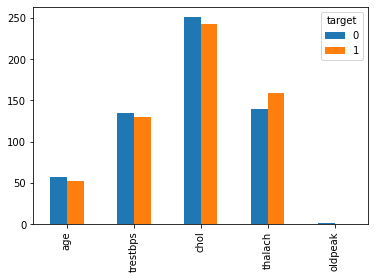

In [9]:
df.groupby('target').mean()[con].T.plot(kind='bar')

<AxesSubplot:xlabel='target'>

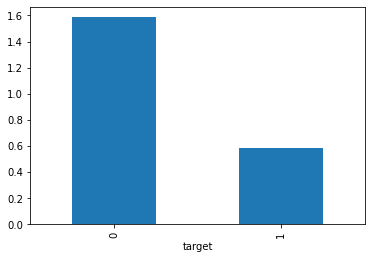

In [10]:
df.groupby('target').mean()['oldpeak'].plot(kind='bar')

In [11]:
x=df.drop('target', axis=1)
y=df['target']

In [12]:
train_x,test_x, train_y, test_y= train_test_split(x,y, test_size=0.3, random_state=10)

In [13]:
model=[LogisticRegression(),
      DecisionTreeClassifier(),
      AdaBoostClassifier(),
      BernoulliNB(),
      GradientBoostingClassifier(),
      RandomForestClassifier()]

In [14]:
acc={}
for mod in model:
    mod.fit(train_x, train_y)
    print(mod.__class__.__name__ , mod.score(test_x, test_y))
    acc[mod]= mod.score(test_x, test_y)

LogisticRegression 0.7912087912087912
DecisionTreeClassifier 0.7472527472527473
AdaBoostClassifier 0.7802197802197802
BernoulliNB 0.7802197802197802
GradientBoostingClassifier 0.7912087912087912
RandomForestClassifier 0.8021978021978022


In [15]:
model1=[LogisticRegression(solver='newton-cg'),
      DecisionTreeClassifier(criterion='gini'),
      AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=100, learning_rate=0.5, algorithm='SAMME'),
      BernoulliNB(),
      GradientBoostingClassifier(max_depth=2, n_estimators=100, learning_rate=1.0),
      RandomForestClassifier(n_estimators=100, criterion='entropy')]

In [16]:
acc1={}
for mod in model1:
    mod.fit(train_x, train_y)
    print(mod.__class__.__name__ , mod.score(test_x, test_y))
    acc1[mod]= mod.score(test_x, test_y)

LogisticRegression 0.7692307692307693
DecisionTreeClassifier 0.7582417582417582
AdaBoostClassifier 0.8351648351648352
BernoulliNB 0.7802197802197802
GradientBoostingClassifier 0.8351648351648352
RandomForestClassifier 0.7912087912087912


In [17]:
acc_new={type(model).__name__: acc for model, acc in acc1.items()}
acc_new

{'LogisticRegression': 0.7692307692307693,
 'DecisionTreeClassifier': 0.7582417582417582,
 'AdaBoostClassifier': 0.8351648351648352,
 'BernoulliNB': 0.7802197802197802,
 'GradientBoostingClassifier': 0.8351648351648352,
 'RandomForestClassifier': 0.7912087912087912}

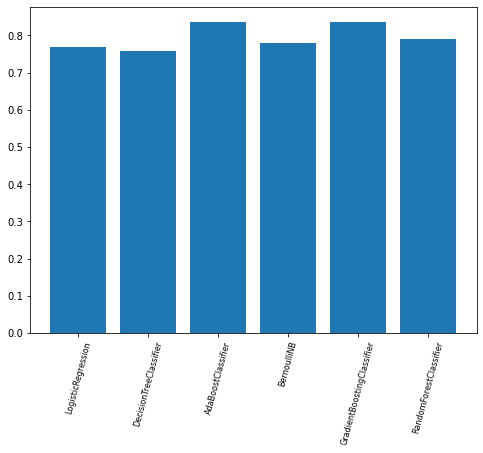

In [18]:
import seaborn as sns
plt.figure(figsize=[8,6])
plt.bar(acc_new.keys(), acc_new.values())
plt.xticks(rotation=75, fontsize=8);

In [19]:
from sklearn.svm import SVC

In [28]:
scv=SVC()
pram={ 'C':[0.05,0.1,1,10,100],
     'gamma':[0.05,0.1,1,10,100]}

In [29]:
gs=GridSearchCV(scv,pram,cv=10,verbose=1)

In [30]:
gs.fit(x,y)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.05, 0.1, 1, 10, 100],
                         'gamma': [0.05, 0.1, 1, 10, 100]},
             verbose=1)

In [31]:
gs.best_estimator_

SVC(C=10, gamma=0.05)

In [32]:
gs.best_score_

0.5705376344086022